# $ \underline{\text{Libraries}} $

In [109]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import torch as t
import random as r
font = {'fontname':'AppleGothic'}

In [132]:
# Plot accuracy error for a single model, input is the model's accuracy 
def plot_acc_error(acc_arr,title):
    length = len(acc_arr)
    fig,ax = plt.subplots(figsize=(10,10))
    ax.plot(np.array(range(0,length)),1-np.array(acc_arr),color='darkorange',linewidth=0.6)
        
    ax.set_title(title,**font,color='aliceblue')
    ax.set_ylabel("Percentage error",**font,color='aliceblue')
    ax.set_xlabel('Epochs',**font,color='aliceblue')

    ax.set_yscale("log")
    ax.set_facecolor('dimgray')
    fig.set_facecolor('dimgray')

    ax.tick_params(axis='y', colors='aliceblue')
    ax.tick_params(axis='x', colors='aliceblue')
    ax.spines['bottom'].set_color('aliceblue')
    ax.spines['left'].set_color('aliceblue')
    ax.spines['top'].set_color('dimgray')
    ax.spines['right'].set_color('dimgray')

    plt.show()

# $ \underline{\text{Import training and testing data}}$

In [129]:
# Open and read file
trainingFile = open('shuttle.trn','r')
lines = trainingFile.readlines()
batch = np.zeros((len(lines),9))
classfy = np.zeros(len(lines))

# Set up input as a 2d array
for i in range(len(lines)):
    temp_str = lines[i].split(' ')
    classfy[i] = int(temp_str[-1])
    for j in range(9):
        batch[i,j] = int(temp_str[j])
        
# Change category counting to start from 0 and convert to int
classfy = np.asarray(classfy, dtype = 'int') - 1

# Open and read file
test_file = open('shuttle.tst','r')
lines_tst = test_file.readlines()
batch_tst = np.zeros((len(lines_tst),9))
classfy_tst = np.zeros(len(lines_tst))

# Set up input as a 2d array
for i in range(len(lines_tst)):
    temp_str = lines_tst[i].split(' ')
    classfy_tst[i] = int(temp_str[-1])
    for j in range(9):
        batch_tst[i,j] = int(temp_str[j])

# Change category counting to start from 0 and convert to int
classfy_tst = np.asarray(classfy_tst, dtype = 'int') - 1

# $ \underline{\text{The Models}}    $

### $\underline{\text{PyTorch Version}} $

In [134]:
device = t.device("cpu")
acc_list = []
# Load training data into tensors
trn_ds = t.tensor(batch,requires_grad=True).to(device)
trn_ds = trn_ds.float()
trn_target = t.tensor(classfy).to(device)
trn_target = trn_target.long()
# Define model architecture
model = t.nn.Sequential(
    t.nn.Linear(9,13),
    t.nn.ReLU(),
    t.nn.Linear(13,7)
)
print("Training the model")
# Define loss function and optimizer
loss_func = t.nn.CrossEntropyLoss()
optimizer = t.optim.Adam(model.parameters(),lr=0.01,weight_decay=1e-3)
for epoch in range(1000):
    # Feed the dataset to the sequential model
    output = model(trn_ds)
    # Obtain a tensor (maxes) with only the most likely classificiations
    maxes = output.max(dim=1)[1]
    # Calculate loss
    loss = loss_func(output,trn_target)
    # Use maxes tensor to count number of equal values between our model output and the target tensor
    acc = t.sum((maxes==trn_target))/len(trn_target)
    acc_list.append(acc.item())
    if epoch % 100 == 99:
        print("Epoch: ",epoch," Loss: ",loss.item()," Accuracy: ",acc.item())
    # Sets the gradients of all optimized tensors s to zero
    optimizer.zero_grad()
    # Computes the gradient of current tensor w.r.t. graph leaves
    loss.backward()
    # Performs a single optimization step
    optimizer.step()
print("Testing the model")
# Load data into tensors
testing_ds = t.tensor(batch_tst,requires_grad=True).to(device)
testing_ds = testing_ds.float()
test_target = t.tensor(classfy_tst).to(device)
test_target = test_target.long()
# Feed the testing dataset to the model and perform similar calculations 
test = model(testing_ds)
losso = loss_func(test,test_target)
maxo = test.max(dim=1)[1]
acc_tst = t.sum((maxo==test_target))/len(test_target)
print(" Loss:",losso.item()," Accuracy:",acc_tst.item())

Training the model
Epoch:  99  Loss:  0.1026565209031105  Accuracy:  0.9695402383804321
Epoch:  199  Loss:  0.05154434219002724  Accuracy:  0.9876551628112793
Epoch:  299  Loss:  0.03958369418978691  Accuracy:  0.9917930960655212
Epoch:  399  Loss:  0.031339555978775024  Accuracy:  0.9935172200202942
Epoch:  499  Loss:  0.022920208051800728  Accuracy:  0.9951034188270569
Epoch:  599  Loss:  0.019042465835809708  Accuracy:  0.9968965649604797
Epoch:  699  Loss:  0.0140371797606349  Accuracy:  0.9976781606674194
Epoch:  799  Loss:  0.011335576884448528  Accuracy:  0.9977930784225464
Epoch:  899  Loss:  0.00916502345353365  Accuracy:  0.9986666440963745
Epoch:  999  Loss:  0.007514202035963535  Accuracy:  0.9988965392112732
Testing the model
 Loss: 0.012996749021112919  Accuracy: 0.9980000257492065


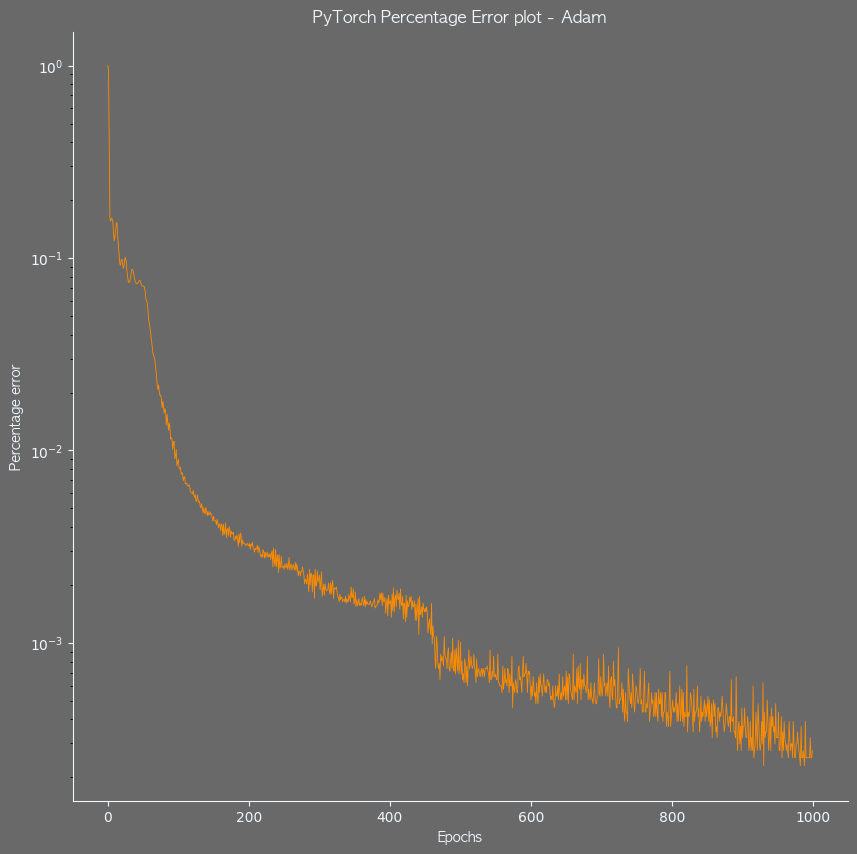

In [133]:
plot_acc_error(np.array(acc_list),"PyTorch Percentage Error plot - Adam")

### $\underline{\text{Tensorflow version}} $

In [4]:
# Define model architecture
model = tf.keras.Sequential([
    layers.Dense(13,activation='relu'),
    layers.Dense(7)
])
# Compile model: loss function is Sparse Categorical Cross entropy, Optimizer is Adam
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
history = []
num_plots = 10
for i in range(num_plots):
    temp = model.fit(batch,classfy,epochs=5,verbose=0)
    history.append(temp.history['accuracy'])
acc_error = np.array(history)
plot_acc_error(acc_error,"Accuracy error: Tensorflow model")

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-05-11 12:02:36.181419: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-11 12:02:36.181763: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-05-11 12:02:36.301543: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-11 12:02:36.560060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-11 12:02:36.829493: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x10c250180
2023-05-11 12:02:36.829523: W t

NotFoundError: Graph execution error:

Detected at node 'StatefulPartitionedCall_2' defined at (most recent call last):
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/asyncio/base_events.py", line 1906, in _run_once
      handle._run()
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2945, in run_cell
      result = self._run_cell(
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3000, in _run_cell
      return runner(coro)
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3203, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3382, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3442, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/3q/1jy1x67j15q4d9r5bq1f5qjc0000gn/T/ipykernel_48675/4148407062.py", line 11, in <module>
      temp = model.fit(batch,classfy,epochs=5,verbose=0)
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/site-packages/keras/engine/training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 527, in minimize
      self.apply_gradients(grads_and_vars)
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1140, in apply_gradients
      return super().apply_gradients(grads_and_vars, name=name)
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 634, in apply_gradients
      iteration = self._internal_apply_gradients(grads_and_vars)
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1166, in _internal_apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1216, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "/Users/danielchristodoulou/opt/anaconda3/envs/PyEnviro/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1211, in apply_grad_to_update_var
      return self._update_step_xla(grad, var, id(self._var_key(var)))
Node: 'StatefulPartitionedCall_2'
could not find registered platform with id: 0x10c250180
	 [[{{node StatefulPartitionedCall_2}}]] [Op:__inference_train_function_709]

In [10]:
test_loss, test_acc = model.evaluate(batch_tst,  classfy_tst, verbose=2)

2023-04-26 11:13:42.517115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


454/454 - 2s - loss: 132.1145 - accuracy: 0.0557 - 2s/epoch - 3ms/step
